# ONLINE SHOPPERS INTENTION ANALYSIS WITH PYTHON

IMPORTING THE REQUIRED LIBRARIES AND DATA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from plotly import graph_objs as go

#read the data
data = pd.read_csv('online_shoppers_intention.csv')

In [6]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
data.shape

(12330, 18)

In [8]:
data.isnull().sum()  #checking for null values in data

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Now have a look at product related bounce rates of customers:

In [9]:
x = data.iloc[:,[5,6]].values
x.shape

(12330, 2)

Now let’s apply the K-elbow method to determine the number of clustering groups:

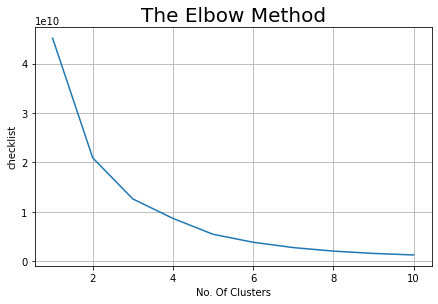

In [10]:
from sklearn.cluster import KMeans

checklist = []
for i in range(1,11):
    km=KMeans(n_clusters=i,
             init='k-means++',
             max_iter = 300,
             n_init = 10,
             random_state = 0,
             algorithm = 'full',
             tol = 0.001)
    km.fit(x)
    labels = km.labels_
    checklist.append(km.inertia_)


plt.rcParams['figure.figsize'] = (13,7)
plt.plot(range(1,11),checklist)
plt.grid()
plt.tight_layout()
plt.title("The Elbow Method",fontsize=20)
plt.xlabel("No. Of Clusters")
plt.ylabel('checklist')
plt.show()

 According to the graph above, the maximum curvature is at the second index, that is, the number of optimal clustering groups for the duration of the product and the bounce rates is 2. Once the number of clusterings determined, we apply the K Means method and plot the clusters:

[0 0 0 ... 0 0 0]


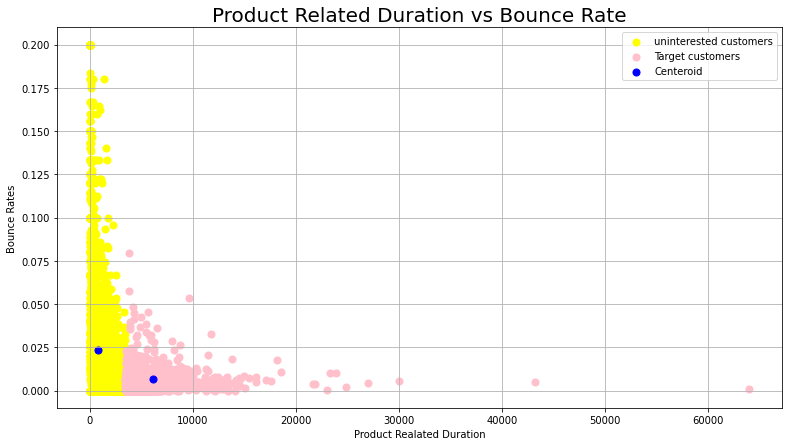

In [16]:
km = KMeans(n_clusters = 2, init='k-means++',max_iter=300,n_init=10,random_state=0)
#get the predicted cluster index for each sample:0,,1,2
y_means = km.fit_predict(x)

plt.rcParams['figure.figsize'] = (13,7)

plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c='yellow',label='uninterested customers')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c='pink',label='Target customers')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='blue',label = "Centeroid")


plt.title("Product Related Duration vs Bounce Rate",fontsize=20)
plt.grid()
plt.xlabel("Product Realated Duration")
plt.ylabel("Bounce Rates")
plt.legend()
plt.show()

Looking at this K Means grouping plot, we can say with certainty that customers who spent more time on a product-related website are very less likely to leave the website after viewing a single page.

Since K-Means is not a supervised learning method, we are adopting other ways of evaluating its clustering result. The leftmost column of the confusion matrix represents the actual label (True or False revenue), and the top row represents the expected clustering groups (uninterested customers or target customers

Adjusted rand index:
0.08359442469281096


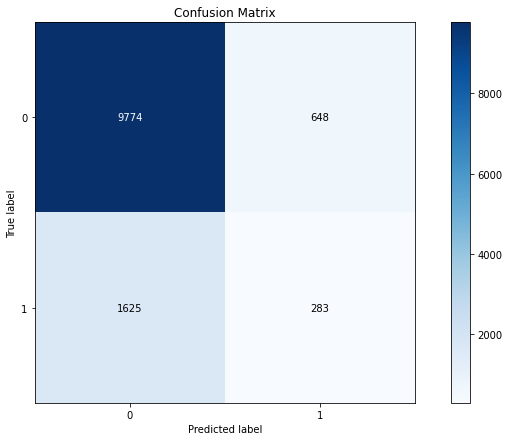

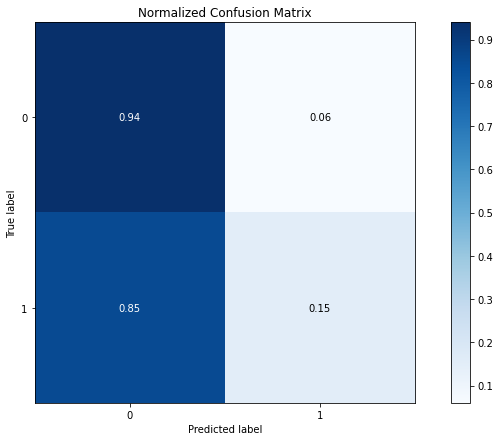

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])

labels_pred = y_means  #to get predicted clustering result label

#print adjusted random index, which measures the similarity of the two assigments

from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true,labels_pred)
print('Adjusted rand index:')
print(score)

import scikitplot as skplt

plt_1 = skplt.metrics.plot_confusion_matrix(labels_true,labels_pred,normalize=False)
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true,labels_pred,normalize=True)
